# What is Ensemble Learning?

It is a learning method that consists of combining multiple machine learning models. A problem in machine learning is that individual models tend to perform poorly. The prediction improved by using this ML algorithm.


## Why do we use Ensemble Techniques?

The answer lies in the term, Wisdom of Crowd i.e. harnessing the collective intelligence of a group of models to produce a more accurate prediction.

These techniques help in reducing the variance and bias tradeoff and improve predictions.

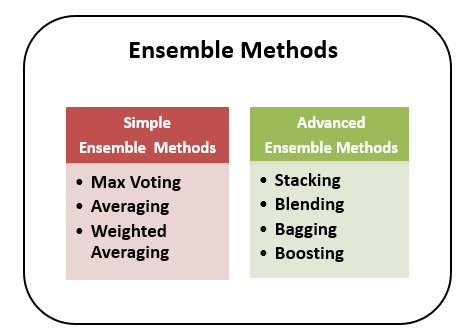

# Voting ensembles

 are the ensembles technique that trains the multiple machine learning models, and then predictions from all the individual models are combined for output.
 
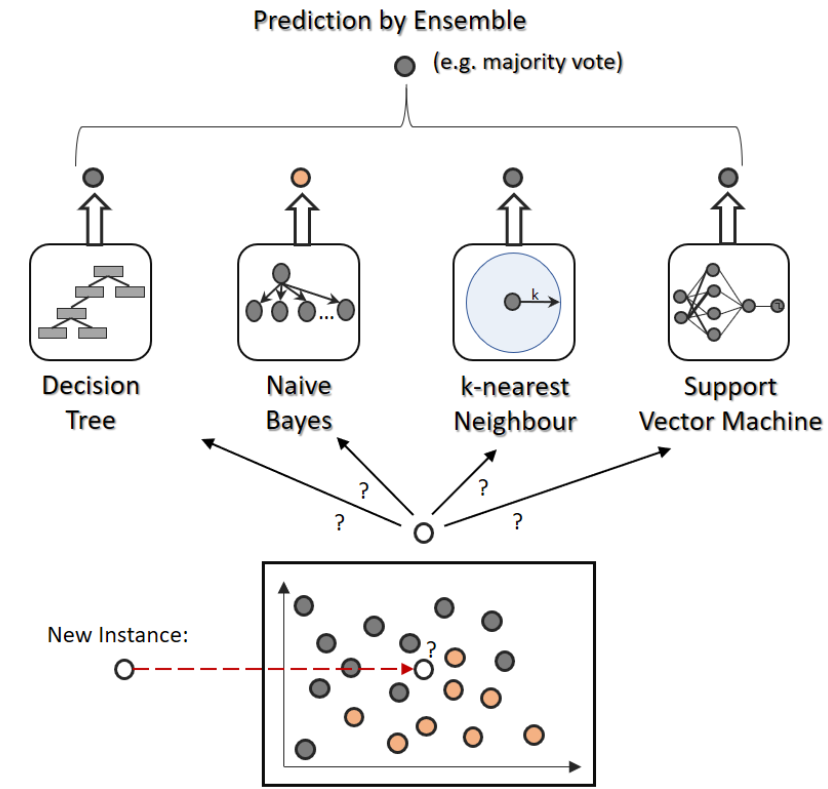


## Voting Classifier using Sklearn

A Voting Classifier is a machine learning model that simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting.

The idea is instead of creating separate dedicated models and finding the accuracy for each them, we create a single model which trains by these models and predicts output based on their combined majority of voting for each output class.

## Voting Classifier supports two types of Votings.

* **Hard Voting**: In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers.

Example: Suppose three classifiers predicted the output class

* Decision Tree predicts Class A
* SVM predicts Class B
* k-NN predicts Class A

In hard voting, since Class A was predicted by two out of three classifiers, the final prediction would be Class A.

**Soft Voting**: In soft voting, the output class is the prediction based on the average of probability given to that class.

Example: Suppose given some input to three models, the prediction probability for

* Decision Tree predicts [0.7, 0.3] (Class A: 70%, Class B: 30%)
* SVM predicts [0.4, 0.6] (Class A: 40%, Class B: 60%)
* k-NN predicts [0.6, 0.4] (Class A: 60%, Class B: 40%)
In soft voting, the average probabilities for Class A and Class B are calculated:

Average probability for Class A: (0.7 + 0.4 + 0.6) / 3 = 0.5667
Average probability for Class B: (0.3 + 0.6 + 0.4) / 3 = 0.4333

Since Class A has the higher average probability score, the final prediction would be Class A.

*Let's explore these in detail with real-life dataset.*

### Problem Statement:

Predict next-day rain by training classification models on the target variable RainTomorrow.


We can read the data back preprocessed datasets for training, validation, and testing using `pd.read_parquet`, where the following data preparation steps have been performed:

* Splitting a dataset into training, validation & test sets
* Filling/imputing missing values in numeric columns
* Scaling numeric features to a (0,1) range
* Encoding categorical columns as one-hot vectors

In [2]:
import pandas as pd

In [25]:
train_inputs = pd.read_parquet('train_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')["RainTomorrow"]
test_targets = pd.read_parquet('test_targets.parquet')["RainTomorrow"]

In [26]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)

print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (9788, 123)
train_targets: (9788,)
test_inputs: (2591, 123)
test_targets: (2591,)


In [27]:
import numpy as np

In [28]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',

In [29]:
X_train = train_inputs[numeric_cols]

X_test = test_inputs[numeric_cols]

# Voting Classifiers Implementation

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [38]:
clf1 = LogisticRegression(random_state=42)
clf2 = RandomForestClassifier(random_state=42)
clf3 = KNeighborsClassifier()
clf4 = DecisionTreeClassifier(random_state=42)

In [39]:
estimators = [('lr',clf1),('rf',clf2),('knn',clf3), ('dt', clf4)]

In [40]:
for estimator in estimators:
    x = cross_val_score(estimator[1], X_train, train_targets, cv=10, scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

lr 0.84
rf 0.85
knn 0.8
dt 0.78


In [41]:
from sklearn.ensemble import VotingClassifier

## Hard Voting

In [42]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc, X_train, train_targets, cv=10, scoring='accuracy')
print(np.round(np.mean(x),2))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.84


Based on the observed reduction in accuracy with Hard Voting compared to Random Forest, we will proceed with Soft Voting.




## Soft Voting


In [43]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x1 = cross_val_score(vc1, X_train, train_targets, cv=10, scoring='accuracy')
print(np.round(np.mean(x1),2))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.84


Based on the evaluation results, it is observed that the Soft Voting method exhibits lower accuracy compared to the Random Forest model, albeit showing improvement over the Hard Voting approach.

Therefore, it is concluded to finalize the Random Forest model for deployment.

## Classifiers of Same Algorithm

In [48]:
rf1 = RandomForestClassifier(max_depth = 4, random_state = 42)
rf2 = RandomForestClassifier(max_depth = 6, random_state = 42)
rf3 = RandomForestClassifier(max_depth = 8, random_state = 42)
rf4 = RandomForestClassifier(max_depth = 10, random_state = 42)
rf5 = RandomForestClassifier(max_depth = None, random_state = 42)

In [49]:
estimators = [("rf1", rf1), ("rf2", rf2),("rf3", rf3),("rf4", rf4),("rf5", rf5)]

In [50]:
for estimator in estimators:
    scores = cross_val_score(estimator[1], X_train, train_targets, cv=10, scoring='accuracy')
    print(estimator[0],np.round(np.mean(scores),2))

rf1 0.81
rf2 0.83
rf3 0.84
rf4 0.84
rf5 0.85


In [51]:
vr = VotingClassifier(estimators)
scores = cross_val_score(estimator[1], X_train, train_targets, cv=10, scoring='accuracy')
print(estimator[0],np.round(np.mean(scores),2))

rf5 0.85


Alright so, finally Random Forest is the best and optimal model on this dataset.


In [52]:
from sklearn.metrics import accuracy_score

In [53]:
# Fit the VotingClassifier on the entire training data
vr.fit(X_train, train_targets)

# Predict the target values for the test data
predicted_targets = vr.predict(X_test)

# Compare predicted values with actual values and calculate accuracy
test_accuracy = accuracy_score(test_targets, predicted_targets)

print("Accuracy on test data:", np.round(test_accuracy, 2))


Accuracy on test data: 0.82


Test accuracy achieved is 82%.

## Voting Regressor

 This ensemble method combines the predictions from multiple individual regression models to make a final prediction by leveraging the wisdom of the crowd by **simple averaging(mean)** or **weighted averaging** of the predictions of its constituent models, which leads to more accurate and robust predictions compared to individual models.

## Voting Regressor Implementation

is exactly same as above, just the target variable needs to be a continuous variable.

### Problem Statement

ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States 2010. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

### Data Importing and Understanding

In [3]:
acme_data = pd.read_csv("acme_dataset.csv")
acme_data.shape

(1338, 7)

In [4]:
acme_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
acme_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_inputs,test_inputs,train_target,test_target = train_test_split(acme_data.drop(columns=["charges"]), acme_data["charges"], test_size=0.2, random_state=42)

### Transformer Implementation

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [10]:
trf1 = ColumnTransformer(transformers=[
    # One Hot Encoding

    ("ohe_sex", OneHotEncoder(sparse_output= False, handle_unknown="ignore", drop= "first"),[1]),
    ("ohe_smoker", OneHotEncoder(sparse_output= False, handle_unknown="ignore", drop= "first"),[4]),
    ("ohe_region", OneHotEncoder(sparse_output= False, handle_unknown="ignore", drop= "first"),[5]),
    # *Handle unknown categories with OneHotEncoder by encoding them as zeros*
    
],remainder="passthrough")

In [11]:
from sklearn.preprocessing import StandardScaler

In [16]:
# Scaling
trf2 = ColumnTransformer([
    ('scale',StandardScaler(),slice(0,8)) # Use column count
])

## Creating Ensemble Pipeline

**Pipeline Vs make_pipeline**

Pipeline requires naming of steps, make_pipeline does not.

(Same applies to ColumnTransformer vs make_column_transformer)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [14]:
# Define individual regressors

lr_regressor = LinearRegression()
dt_regressor = DecisionTreeRegressor(criterion = 'squared_error', max_depth=4, max_features = 1.0, min_samples_split= 0.1)
rf_regressor = RandomForestRegressor(criterion = 'squared_error', max_depth=4, max_features = 1.0, min_samples_split= 0.1, n_estimators=100)

In [20]:
estimators = [
        ("linear_regression", lr_regressor),
        ('decision_tree', dt_regressor),
        ('random_forest', rf_regressor)
    ]

In [22]:
# Create a pipeline with preprocessing and the Voting Regressor
pipeline = Pipeline([
    ("trf1", trf1),
    ("trf2", trf2),
    ("voting_regressor", VotingRegressor(estimators))  
])

In [24]:
# Fit the pipeline to the training data
pipeline.fit(train_inputs, train_target)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1]),
                                                 ('ohe_smoker',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [4]),
                                                 ('ohe_region',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, 8, None))])),
                ('voting_regressor',
                 VotingRegressor(estimators=[('linear_regression',
                                              LinearRegression()),
                                             ('decision_tree',
                                              DecisionTreeRegressor(max_depth=4,
                                                                    max_features=1.0,
                                                                    min_samples_split=0.1)),
                                             ('random_forest',
                                              RandomForestRegressor(max_depth=4,
                                                                    min_samples_split=0.1))]))])

### Calculating the loss after training

In [23]:
from sklearn.metrics import r2_score

In [25]:
# Evaluate the model on the test data
test_pred = pipeline.predict(test_inputs)
print("r2score:", r2_score(test_target, test_pred))

r2score: 0.864196487433592


If you remember the previous tutorial, this ensemble model has increased variance.

## Advantages and Disadvantages of using Voting Ensemble:

### Advantages:

* **Improved Performance**: Voting ensembles often yield better predictive performance compared to individual classifiers, especially when the base classifiers are diverse and complementary to each other.

* **Reduced Overfitting**: By combining multiple models, voting ensembles can help reduce overfitting, particularly if the individual models are prone to overfitting on the training data.

* **Robustness**: Ensembles are more robust to noise and outliers in the data, as errors made by one classifier may be compensated by the correct predictions of other classifiers.

* **Versatility**: Voting ensembles can be applied to a wide range of machine learning tasks, including classification, regression, and clustering, making them versatile and widely applicable.

### Disadvantages:

* **Increased Complexity**: Ensembles typically require more computational resources and may introduce additional complexity to the modeling process, particularly if a large number of base classifiers are used.

* **Less Interpretability**: As ensembles combine multiple models, interpreting the final prediction can be challenging, especially when using complex techniques such as soft voting with probabilistic outputs.

* **Dependency on Base Classifiers**: The performance of a voting ensemble heavily relies on the quality and diversity of the base classifiers. If the base classifiers are similar or poorly performing, the ensemble may not yield significant improvements.

* **Training Time Complexity**: Training a voting ensemble may require more time compared to training individual classifiers, especially if the ensemble consists of a large number of models or if the base classifiers are computationally intensive.


It's essential to carefully consider these factors when deciding whether to use a Voting Ensemble for a particular machine learning task.

> Stay tuned for other Ensemble Techniques Repo and Don't forget to **Star** this Github Repository for more such contents and consider **sharing with others**.